In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
tf.__version__

'2.3.0'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
hotel_review = pd.read_csv('/content/drive/My Drive/Hotel_Reviews.csv')

In [6]:
hotel_review.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [7]:
hotel_review.shape

(515738, 17)

In [8]:
positive_review = hotel_review.loc[:,['Positive_Review']]
negative_review = hotel_review.loc[:,['Negative_Review']]

In [9]:
options = ['No Positive', 'No Negative']
selected_positive_review = positive_review.loc[~(positive_review['Positive_Review'] == "No Positive"), :]
selected_negative_review = negative_review.loc[~(negative_review['Negative_Review'] == "No Negative"), :]
selected_positive_review['is_positive'] = 1
selected_positive_review.columns = ['review', 'is_positive']
selected_positive_review.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,review,is_positive
0,Only the park outside of the hotel was beauti...,1
1,No real complaints the hotel was great great ...,1
2,Location was good and staff were ok It is cut...,1
3,Great location in nice surroundings the bar a...,1
4,Amazing location and building Romantic setting,1


In [10]:
selected_negative_review['is_postive'] = 0
selected_negative_review.columns = ['review', 'is_positive']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
selected_positive_review = selected_positive_review[:30000]
selected_negative_review = selected_negative_review[:30000]

In [35]:
print(selected_negative_review.shape)
print(selected_positive_review.shape)


(30000, 2)
(30000, 2)


In [36]:
reviews = selected_positive_review.append(selected_negative_review)

In [37]:
reviews.head(n=10)

,review,is_positive
0,Only the park outside of the hotel was beauti...,1
1,No real complaints the hotel was great great ...,1
2,Location was good and staff were ok It is cut...,1
3,Great location in nice surroundings the bar a...,1
4,Amazing location and building Romantic setting,1
5,Good restaurant with modern design great chil...,1
6,The room is spacious and bright The hotel is ...,1
7,Good location Set in a lovely park friendly s...,1
9,The room was big enough and the bed is good T...,1
10,Rooms were stunningly decorated and really sp...,1


In [38]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# New section

In [39]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [40]:
# clean text data
reviews["review"] = reviews["review"].apply(lambda x: clean_text(x))

In [41]:
reviews_text = reviews['review'].tolist()
labels = reviews['is_positive'].tolist()

enc = LabelEncoder()
encoded_labels = enc.fit_transform(labels)


#TOKENIZE
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
import nltk
nltk.download('punkt')
complete_reviews=[] 
for review in reviews['review']:
  for sent in sent_tokenize(review):
    complete_reviews.append(sent)
print('complete_reviews done') 
final_corpus = [sentence for sentence in complete_reviews if sentence.strip() !='']
print('final corpus done')
word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(sent) for sent in final_corpus]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
complete_reviews done
final corpus done


In [46]:
# model parameters
vocab_size = len(word_tokenized_corpus)
embedding_dim = 16
max_length = 200
truc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'


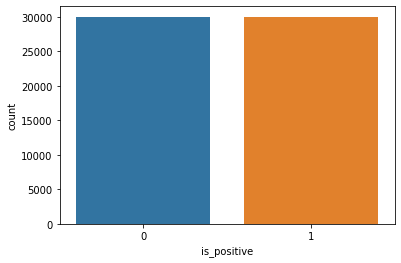

In [47]:
import seaborn as sns
sns.countplot(x="is_positive",data=reviews)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# splitting dataset using stratified sampling
x_train, x_val, y_train, y_val = train_test_split(reviews.review, 
                                                  reviews.is_positive, 
                                                  test_size=0.30, 
                                                  random_state=17,
                                                  stratify=reviews.is_positive.values
                                               )

In [50]:
import pandas as pd
data_train = pd.DataFrame()
data_test  = pd.DataFrame()
data_train['label'] = y_train
data_train['text'] = x_train
data_test['label'] = y_val
data_test['text'] = x_val

In [51]:
train_sentences = data_train['text'].tolist()
train_labels = data_train['label'].tolist()
test_sentences = data_test['text'].tolist()
test_labels = data_test['label'].tolist()
data_train.groupby(['label']).count()

,text
label,
0,21000
1,21000


In [52]:
#Ratio of +ve and -ve reviews in training dataset
ratio = str(data_train['label'].value_counts()[0]/data_train['label'].value_counts()[1])
print("ratio of +ve to -ve dataEntry- "+ratio+":1")

ratio of +ve to -ve dataEntry- 1.0:1


In [53]:
y_train.head(n=10)

15393    0
12330    1
18976    0
26737    1
31241    1
33259    0
10836    0
30247    0
4817     0
15889    0
Name: is_positive, dtype: int64

In [54]:
!pip install bert-for-tf2

     |████████████████████████████████| 51kB 2.1MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.7-cp36-none-any.whl size=30539 sha256=ad6bd0fd1f41eae42bb07732ef5124bf0ce1f4b756562e4c8c34665d443573f5
  Stored in directory: /root/.cache/pip/wheels/e1/f8/e2/b98f79a6b8cc898d8e4102b83acb8a098df7d27500a2bac912
  Created wheel for py-params: filename=py_params-0.9.7-cp36-none-any.whl size=7304 sha256=bd8911f2ba01568fe00959e4f26b267cbd1fc2283383359e14ab294afb3e6848
  Stored in directory: /root/.cache/pip/wheels/67/f5/19/b461849a50aefdf4bab47c4756596e82ee2118b8278e5a1980
  Created wheel for params-flow: filename=params_flow-0.8.2-cp36-none-any.whl size=19475 sha256=15fedb7e320f103c4dc47e6d4a6cfa0afc8a5bf2aa6ab7268e592fe03859825e
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow


In [56]:
!pip install sentencepiece

In [57]:
import bert
!pip install "tensorflow_hub>=0.6.0"
import tensorflow_hub as hub

In [58]:
BertTokenizer = bert.bert_tokenization.FullTokenizer

In [59]:
model_url = "https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/1"
bert_layer = hub.KerasLayer(model_url, trainable=False)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()

In [62]:
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocab_file, to_lower_case)

Help on FullTokenizer in module bert.tokenization.bert_tokenization object:

class FullTokenizer(builtins.object)
 |  Runs end-to-end tokenziation.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, vocab_file, do_lower_case=True)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  convert_ids_to_tokens(self, ids)
 |  
 |  convert_tokens_to_ids(self, tokens)
 |  
 |  tokenize(self, text)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)

None


In [82]:
tokenizer.tokenize("This hotel is sooo nice")
print(len(tokenizer.vocab))

28996


In [65]:
def tokenize_reviews(text_review):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_review))

In [66]:
tokenized_review = [tokenize_reviews(review) for review in reviews_text]

In [77]:
vocab_size = len(tokenizer.vocab) + 1
embedding_dim = 128
max_length = 128
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion=0.7

In [70]:
train_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:127], train_sentences))
test_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:127], test_sentences))

In [71]:
train_tokens_ids = list(map(tokenizer.convert_tokens_to_ids, train_tokens))

In [72]:
test_tokens_ids = list(map(tokenizer.convert_tokens_to_ids, test_tokens))

In [73]:
train_padded = tf.keras.preprocessing.sequence.pad_sequences(train_tokens_ids, maxlen=128, truncating="post", padding="post", dtype="int")
test_padded = tf.keras.preprocessing.sequence.pad_sequences(test_tokens_ids, maxlen=128, truncating="post", padding="post", dtype="int")

In [74]:
train_padded = np.array(train_padded)
train_labels = np.array(train_labels)
test_padded = np.array(test_padded)
test_labels = np.array(test_labels)

In [86]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
from keras.utils.vis_utils import plot_model



def define_model(length, vocab_size):
	# channel 1
	inputs1 = Input(shape=(length,))
	embedding1 = Embedding(vocab_size, 100)(inputs1)
	conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
	drop1 = Dropout(0.5)(conv1)
	pool1 = MaxPooling1D(pool_size=2)(drop1)
	flat1 = Flatten()(pool1)
	# channel 2
	inputs2 = Input(shape=(length,))
	embedding2 = Embedding(vocab_size, 100)(inputs2)
	conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
	drop2 = Dropout(0.5)(conv2)
	pool2 = MaxPooling1D(pool_size=2)(drop2)
	flat2 = Flatten()(pool2)
	# channel 3
	inputs3 = Input(shape=(length,))
	embedding3 = Embedding(vocab_size, 100)(inputs3)
	conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
	drop3 = Dropout(0.5)(conv3)
	pool3 = MaxPooling1D(pool_size=2)(drop3)
	flat3 = Flatten()(pool3)
	# merge
	merged = concatenate([flat1, flat2, flat3])
	# interpretation
	dense1 = Dense(10, activation='relu')(merged)
	outputs = Dense(1, activation='sigmoid')(dense1)
	model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
	# compile
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# summarize
	print(model.summary())
	plot_model(model, show_shapes=True, to_file='multichannel.png')
	return model
 

In [98]:
length = 128
vocab_size = len(tokenizer.vocab) + 1
model = define_model(length, vocab_size)

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 128)]        0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 128, 100)     2899700     input_13[0][0]                   
_______________________________________________________________________________________

In [109]:
from numpy import array
history = model.fit([train_padded,train_padded,train_padded], train_labels, epochs=10, validation_data=([test_padded, test_padded, test_padded], test_labels))

Epoch 1/10
1313/1313 [==============================] - 183s 139ms/step - loss: 0.0439 - accuracy: 0.9840 - val_loss: 0.4848 - val_accuracy: 0.9208
Epoch 2/10
1313/1313 [==============================] - 178s 136ms/step - loss: 0.0416 - accuracy: 0.9854 - val_loss: 0.5242 - val_accuracy: 0.9180
Epoch 3/10
1313/1313 [==============================] - 181s 138ms/step - loss: 0.0415 - accuracy: 0.9853 - val_loss: 0.5478 - val_accuracy: 0.9179
Epoch 4/10
1313/1313 [==============================] - 175s 134ms/step - loss: 0.0414 - accuracy: 0.9847 - val_loss: 0.5582 - val_accuracy: 0.9187
Epoch 5/10
1313/1313 [==============================] - 186s 141ms/step - loss: 0.0401 - accuracy: 0.9850 - val_loss: 0.5754 - val_accuracy: 0.9199
Epoch 6/10
1313/1313 [==============================] - 191s 146ms/step - loss: 0.0396 - accuracy: 0.9852 - val_loss: 0.5896 - val_accuracy: 0.9177
Epoch 7/10
1313/1313 [==============================] - 180s 137ms/step - loss: 0.0397 - accuracy: 0.9859 - val_

In [110]:
from sklearn.metrics import confusion_matrix
x_pred = model.predict([test_padded,test_padded,test_padded])
x_pred = x_pred > 0.5
x_pred = x_pred.astype(int)
y_pred = test_labels
confusion_matrix(x_pred, y_pred)

array([[8464,  891],
       [ 536, 8109]])

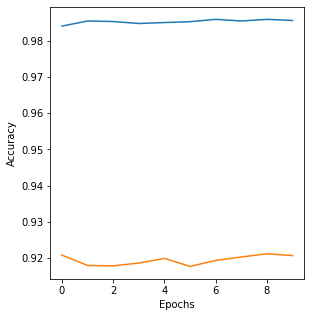

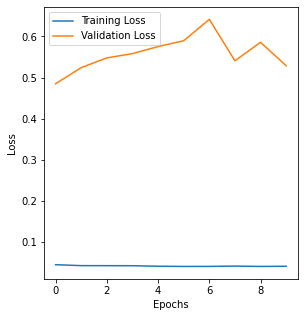

In [111]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()